## 23일차 강의 (2021.8.4)
# 머신러닝

### 확인 문제
- 행복 데이터에서, 행복지수와 나머지 중요 6가지 속성, 즉 7가지 속성을 불러오시오.
- 이들 7개 속성의 상관계수를 구하고 그래프로 그려보시오.
- 그래프를 이용해 속성들의 상관관계를 분석해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
X = happy.iloc[:, [2,6,7,8,9,10,11]].values
X.shape

(149, 7)

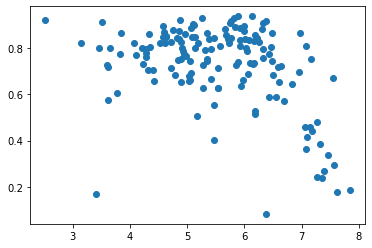

In [10]:
plt.scatter(X[:,0], X[:,-1])

In [5]:
np.corrcoef(X[:,0], X[:,1])

array([[1.       , 0.7897597],
       [0.7897597, 1.       ]])

In [6]:
mat = np.corrcoef(X.T)
mat.shape

(7, 7)

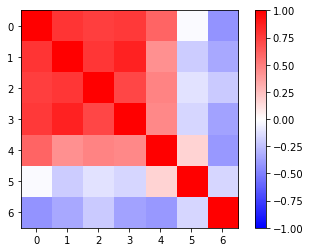

In [8]:
plt.imshow(mat, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()

> 칼러맵 : https://matplotlib.org/stable/tutorials/colors/colormaps.html

### 결정트리

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

In [25]:
X = iris.data[50:, :2]
y = iris.target[50:]

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

Text(0, 0.5, 'sepal width')

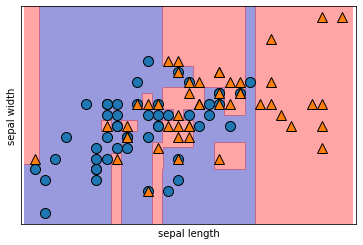

In [28]:
import mglearn

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.1, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, alpha=1)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

> 위 그림은 최대로 과적합 현상을 보여준다

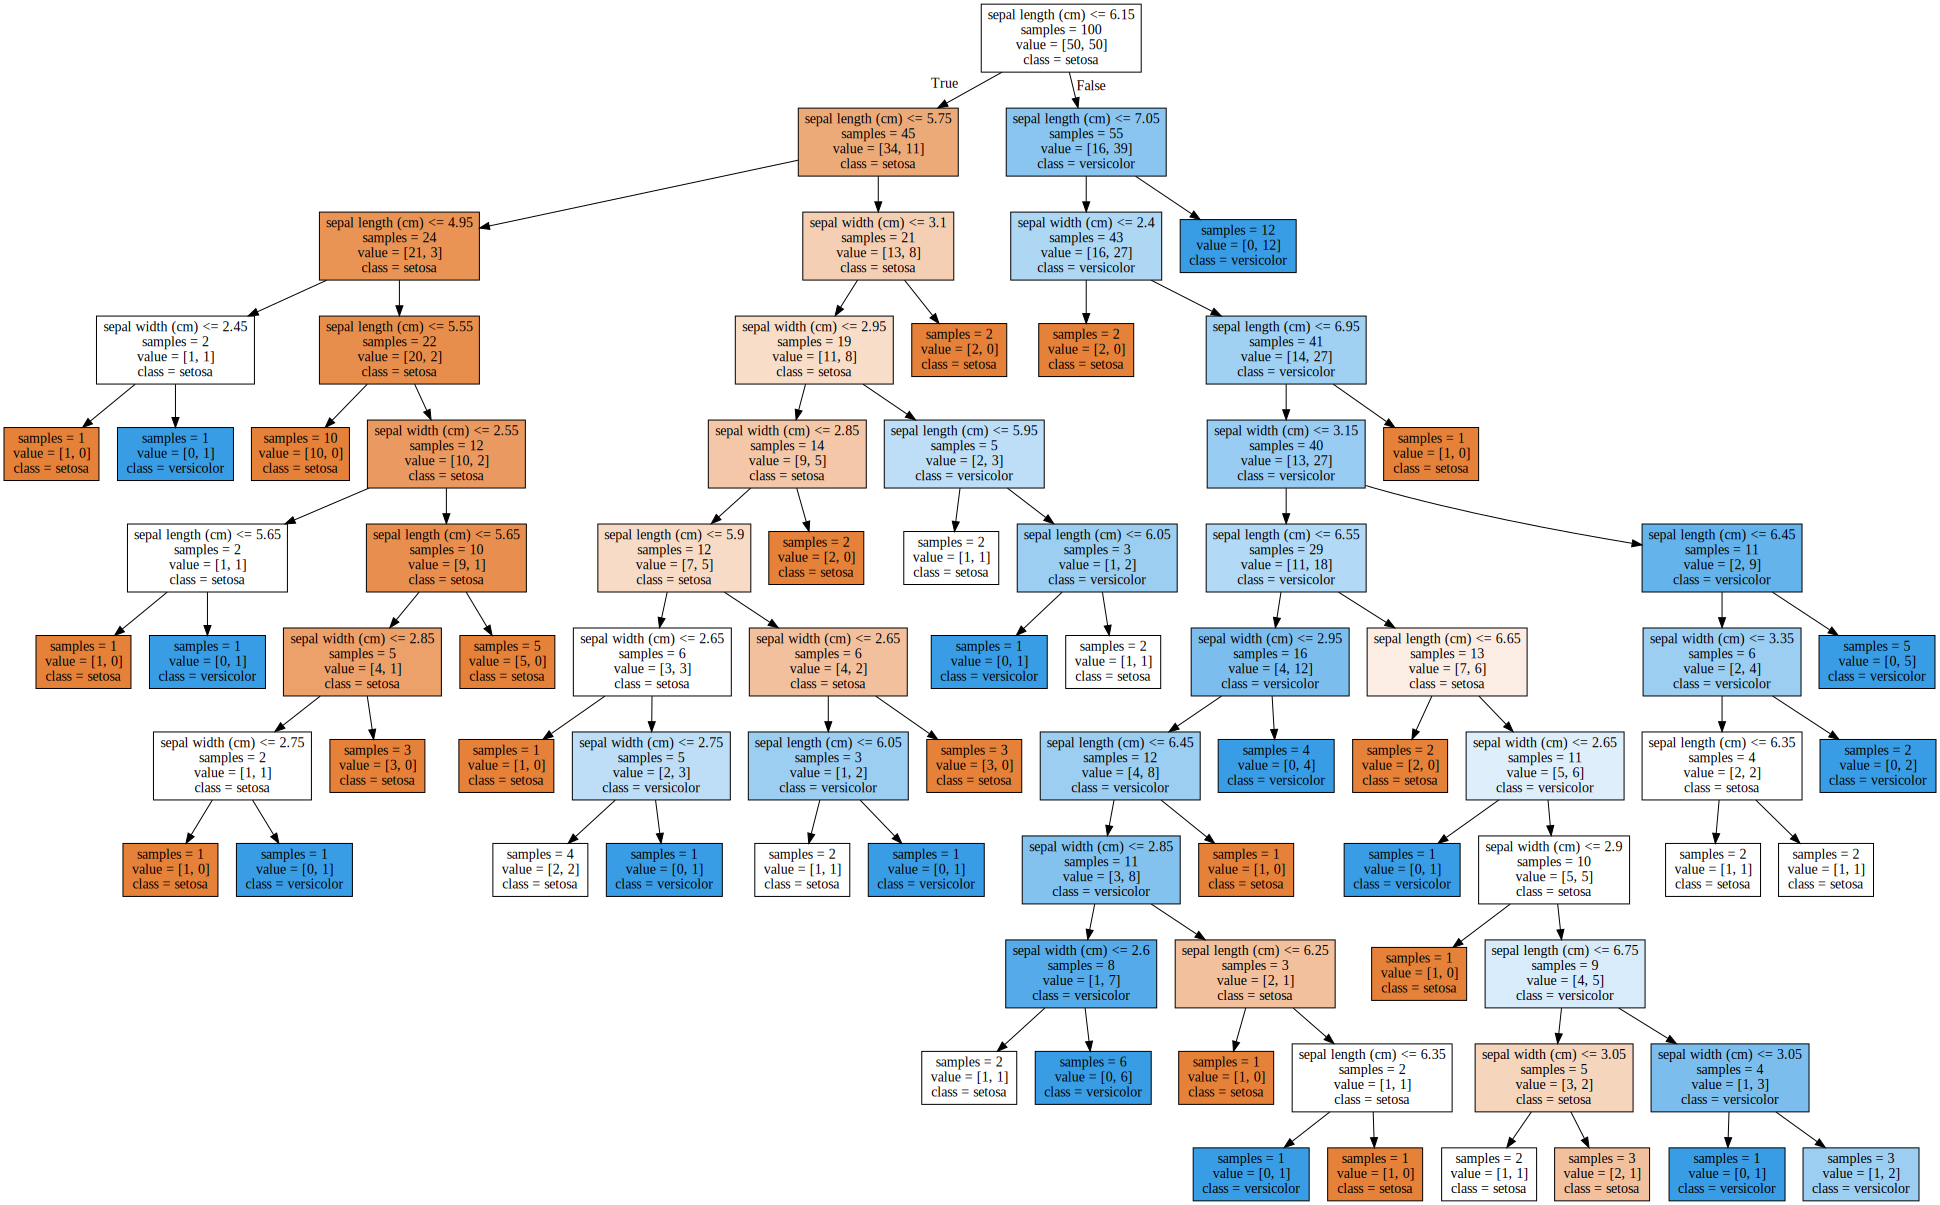

In [31]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=iris.target_names[:2],
                feature_names=iris.feature_names[:2], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [48]:
model = DecisionTreeClassifier(max_leaf_nodes=8)
model.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=8)

Text(0, 0.5, 'sepal width')

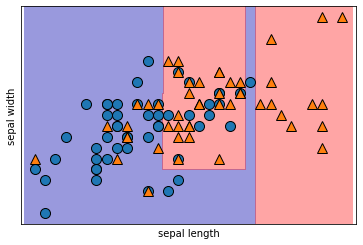

In [49]:
import mglearn

mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.1, alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, alpha=1)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

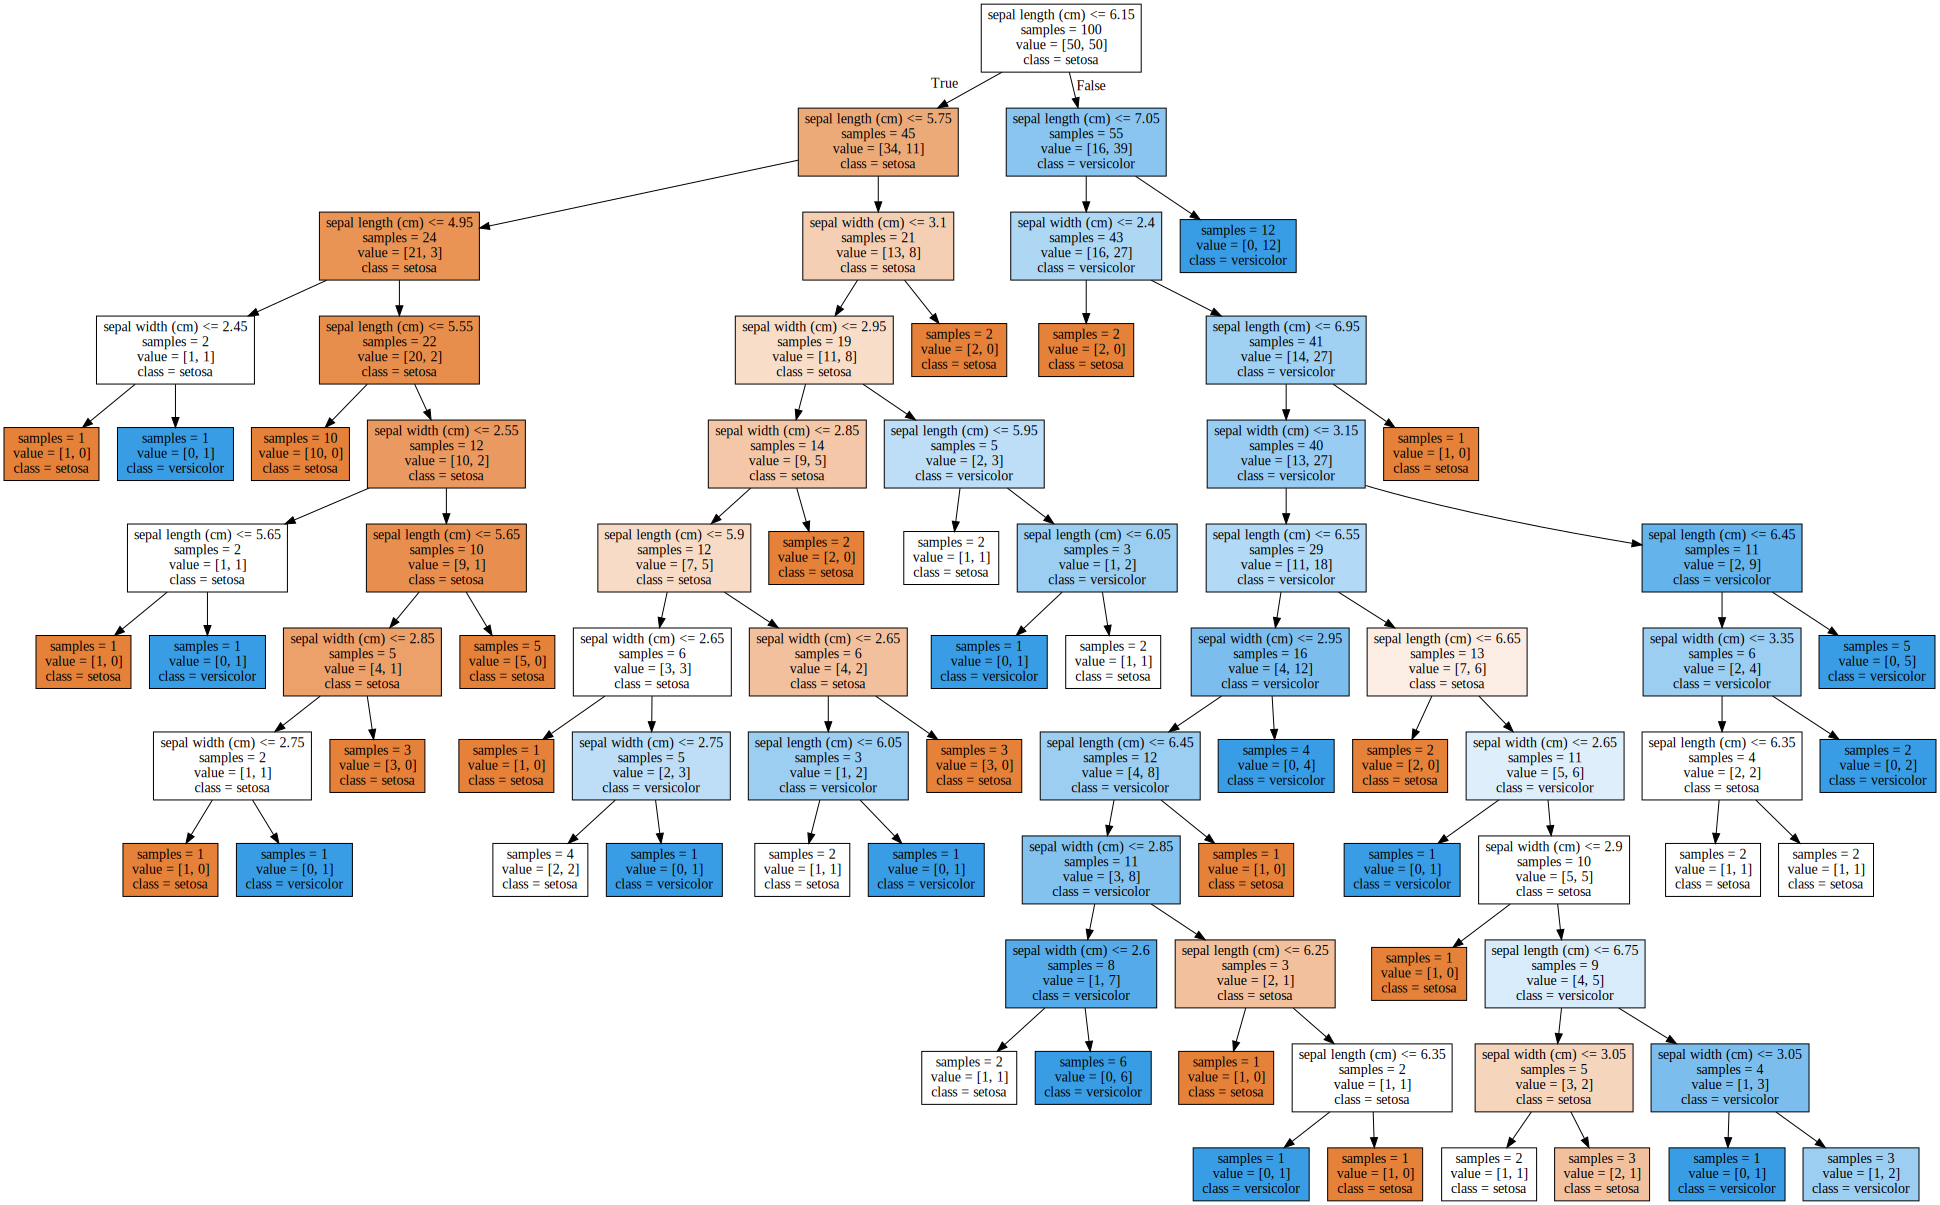

In [31]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=iris.target_names[:2],
                feature_names=iris.feature_names[:2], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 결정트리를 이용한 앙상블 기법
- Random Forest : 나무를 여러개 만든다(Forest). max_features를 적용하고 랜덤샘플을 고른다(Random).
- Gradient Boosting : 나무를 여러개 만드는데, 하나씩 만들어 가면서 앞의 나무들을 개선하도록 다음 나무를 만든다

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### 주성분 분석 (PCA: Principal Component Analysis)

In [50]:
from sklearn.decomposition import PCA

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [51]:
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
X_norm.shape

from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_norm) # 주성분들을 찾는다

pca.components_.shape # (주성분 갯수, 방향을 나태내는 숫자 갯수)

(30, 30)

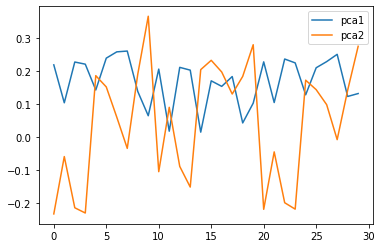

In [52]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]
plt.plot(pca1)
plt.plot(pca2)
plt.legend(['pca1', 'pca2'])

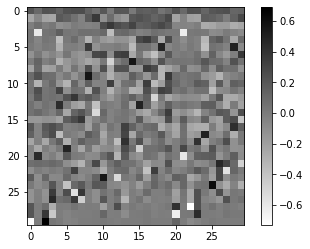

In [53]:
plt.imshow(pca.components_, cmap='gray_r')
plt.colorbar()
#plt.ylabel(['pca-%d' % (i+1) for i in range(30)])

In [54]:
X_pca = pca.transform(X_norm)
X_pca.shape # PCA1 ~ PCA30

(569, 30)

In [55]:
X_norm[0,:5]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633])

In [56]:
X_pca[0,:5]

array([ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012])

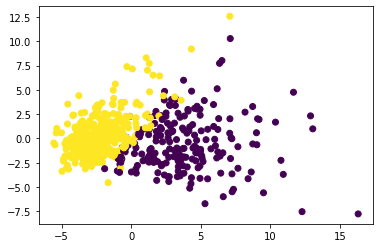

In [57]:
X_pca[:, :2] # 중요한 속성 2개를 뽑아낸다

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

In [58]:
pca = PCA(2)

pca.fit(X_norm) # 주성분들을 찾는다

pca.components_.shape # (주성분 갯수, 방향을 나태내는 숫자 갯수)

(2, 30)

In [59]:
X_pca = pca.transform(X_norm)
X_pca.shape

(569, 2)

### MNIST (숫자 필기체 인식)

In [60]:
from sklearn.datasets import load_digits

mnist = load_digits()
display(mnist.keys(), mnist.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

(1797, 64)

In [61]:
image = mnist.data[0]
image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

(-0.5, 7.5, 7.5, -0.5)

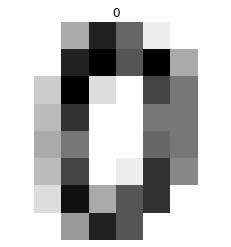

In [68]:
plt.imshow(image.reshape(8,8), cmap='gray_r', vmin=0, vmax=15)
plt.title(mnist.target[0])
plt.axis('off')

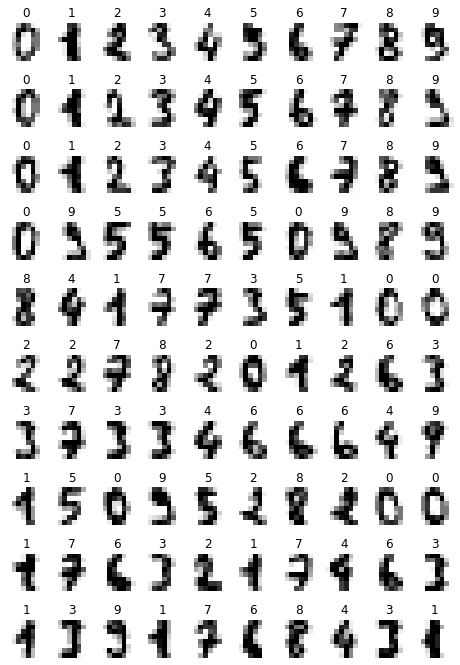

In [72]:
plt.figure(figsize=[8,12])
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(mnist.data[i].reshape(8,8), cmap='gray_r', vmin=0, vmax=15)
    plt.title(mnist.target[i])
    plt.axis('off')

In [73]:
X = mnist.data
X.shape

(1797, 64)

In [74]:
pca = PCA()
pca.fit(X)

PCA()

In [76]:
pca.components_.shape

(64, 64)

In [77]:
pca1, pca2 = pca.components_[:2]

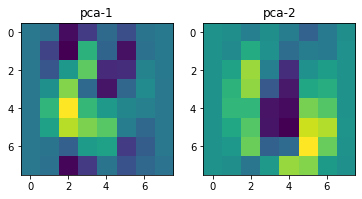

In [80]:
plt.subplot(1,2,1)
plt.title('pca-1')
plt.imshow(pca1.reshape(8,8))
plt.subplot(1,2,2)
plt.title('pca-2')
plt.imshow(pca2.reshape(8,8))